# Exércicio 2.5) Sethna
### Gabriel Victor Carvalho Rocha - 2018054907

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

## Exércicio 2.5) (a)



In [2]:
def caminhada_aleatoria_1d(N):
  x = 0
  passos = [x]
  for i in range(0, N):
    x = x + random.uniform(-0.5, 0.5) 
    passos.append(x)
  return passos

In [3]:
def caminhada_aleatoria_2d(N):
  x, y = 0, 0
  passos = [[x], [y]]
  for i in range(0, N):
    x = x + random.uniform(-0.5, 0.5)
    y = y + random.uniform(-0.5, 0.5)
    passos[0].append(x)
    passos[1].append(y)
  return passos

### Gráfico para poucas caminhadas de 10.000 passos

In [4]:
#Gerando 4 caminhadas aleatorias 1D de tamanho 10.000
lista_passos_1d = []

for _ in range(4):
  lista_passos_1d.append(caminhada_aleatoria_1d(10000))

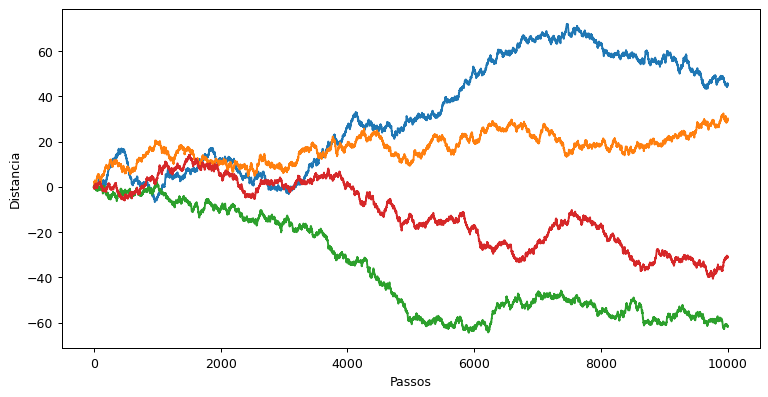

In [5]:
#Plot das 4 caminhadas aleatorias 1D de tamanho 10.000
plt.figure(figsize=(10, 5), dpi=90)

for passos in lista_passos_1d:
  plt.plot(passos)
  
plt.xlabel("Passos")  
plt.ylabel("Distancia")
plt.show()

### Gráfico de $x$ por $y$ para poucas caminhadas aleatórias bidimensionais com $N$ = 10, 1.000, e 100.000

In [6]:
#Gerando 3 caminhadas aleatorias 2D de tamanhos 10, 1.000 e 100.000 
passos_10_2d = caminhada_aleatoria_2d(10)
passos_1000_2d = caminhada_aleatoria_2d(1000)
passos_100000_2d = caminhada_aleatoria_2d(100000)

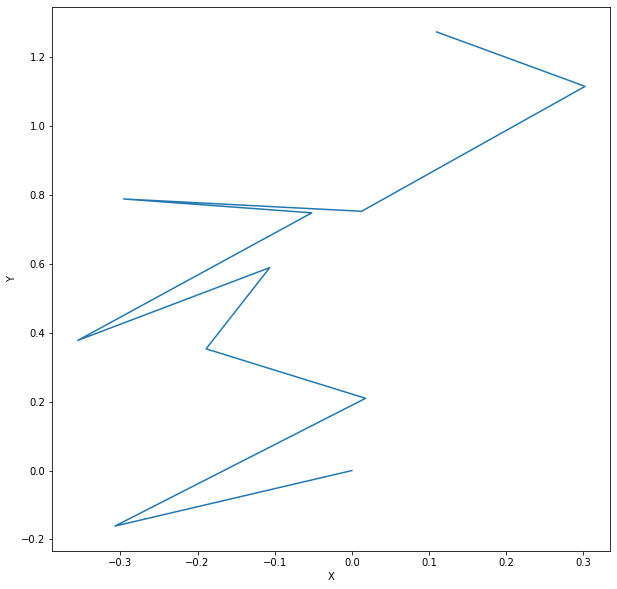

In [7]:
#Plot da caminhada aleatoria 2D de tamanho 10
plt.figure(figsize=(10, 10))

plt.plot(passos_10_2d[0], passos_10_2d[1])
  
plt.xlabel("X")  
plt.ylabel("Y")
plt.show()

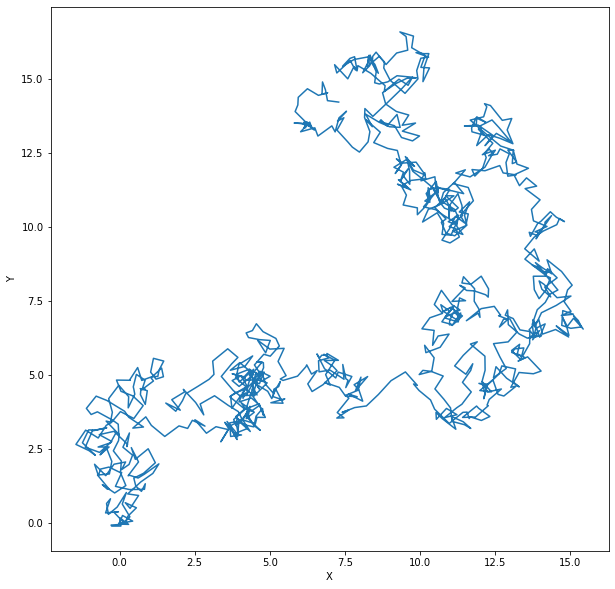

In [8]:
#Plot da caminhada aleatoria 2D de tamanho 1.000
plt.figure(figsize=(10, 10))

plt.plot(passos_1000_2d[0], passos_1000_2d[1])
  
plt.xlabel("X")  
plt.ylabel("Y")
plt.show()

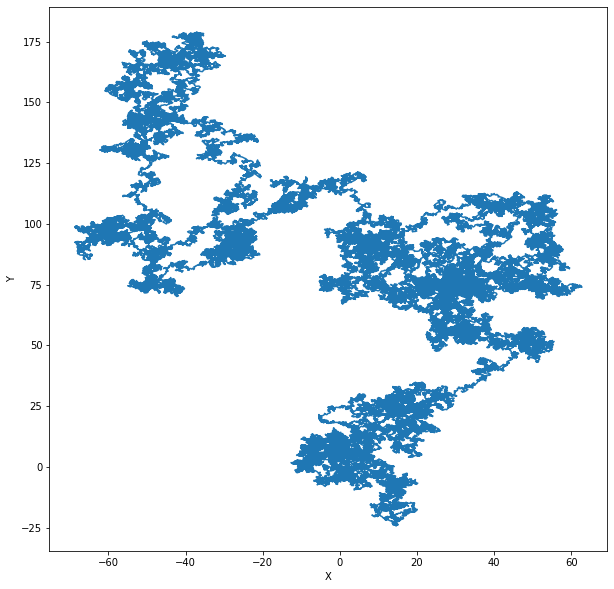

In [9]:
#Plot da caminhada aleatoria 2D de tamanho 100.000
plt.figure(figsize=(10, 10))

plt.plot(passos_100000_2d[0], passos_100000_2d[1])
  
plt.xlabel("X")  
plt.ylabel("Y")
plt.show()

In [10]:
def distancia_origem_final(passos_2d):
  x_f = passos_2d[0][-1] #ultimo x
  y_f = passos_2d[1][-1] #ultimo y
  return (((x_f - 0) ** 2) + ((y_f - 0) ** 2)) ** (1/2)

In [11]:
aumento_10_1000 = 0
aumento_1000_100000 = 0

num_execucoes = 50

for _ in range(num_execucoes): 
  passos_10_2d = caminhada_aleatoria_2d(10)
  passos_1000_2d = caminhada_aleatoria_2d(1000)
  passos_100000_2d = caminhada_aleatoria_2d(100000)

  distancia_10 = distancia_origem_final(passos_10_2d)
  distancia_1000 = distancia_origem_final(passos_1000_2d)
  distancia_100000 = distancia_origem_final(passos_100000_2d)

  aumento_10_1000 += distancia_1000 / distancia_10
  aumento_1000_100000 += distancia_100000 / distancia_1000

aumento_medio_10_1000 = aumento_10_1000 / num_execucoes
aumento_medio_1000_100000 = aumento_1000_100000 / num_execucoes

print(f"Aumento medio da distancia 10 para 1000: {aumento_medio_10_1000}")
print(f"Aumento medio da distancia 1000 para 100000: {aumento_medio_1000_100000}")

Aumento medio da distancia 10 para 1000: 16.073742206289776
Aumento medio da distancia 1000 para 100000: 12.167535551302981


### "Se você multiplicar o número de passo por 100, a distância final da caminhada aumenta por cerca de 10 vezes?"
R: Como pode ser observado na execução acima, gerando 50 caminhadas aleatórias e pegando a média dos aumentos entre os tamanhos 10..1000 e 1000..100000, há um aumento bem próximo de 10 na média. Isso acontece pois com $N$ passos a distância final da caminhada é $\sqrt{N}$.

## Exércicio 2.5) (b)

In [12]:
def pontos_finais_caminhadas_2d(W, N):
  pontos = [[], []]
  for _ in range(W):
    caminhada = caminhada_aleatoria_2d(N)
    pontos[0].append(caminhada[0][-1]) #ultimo x
    pontos[1].append(caminhada[1][-1]) #ultimo y
  return pontos

In [13]:
#Gerando pontos finais de 10.000 caminhadas aleatorias 2D de tamanho 1 e 10
pontos_finais_10000_1 = pontos_finais_caminhadas_2d(10000, 1)
pontos_finais_10000_10 = pontos_finais_caminhadas_2d(10000, 10)

### Gráfico de dispersão das coordenadas finais de 10.000 caminhadas aleatórias com $N$ = 1 e 10, superpostos no mesmo gráfico.

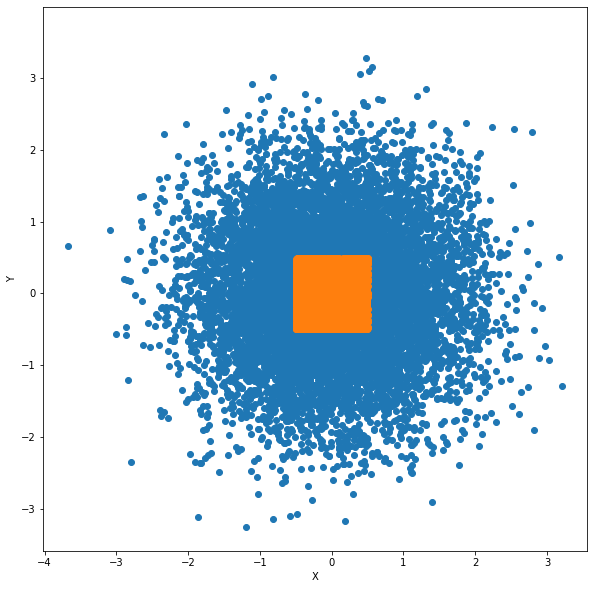

In [14]:
#Plot dos 10.000 pontos finais 2D de tamanho 1
plt.figure(figsize=(10, 10))

plt.scatter(pontos_finais_10000_10[0], pontos_finais_10000_10[1])
plt.scatter(pontos_finais_10000_1[0], pontos_finais_10000_1[1])
plt.axis('square')
plt.xlabel("X")  
plt.ylabel("Y")
plt.show()

## Exércicio 2.5) (c)

### Calcule o desvio quadrático médio (RMS) $a$ para passos uniformemente distribuidos no intervalo $(\frac{-1}{2}, \frac{1}{2})$ em uma dimensão.

$$a = \sqrt{<(\Delta x)>^2}$$  
$$a = \sqrt{\int_{\tfrac{-1}{2}}^{\tfrac{1}{2}} x^2 \,dx}$$  
$$a = \sqrt{\tfrac{x^3}{3}\Big|_\tfrac{-1}{2}^\tfrac{1}{2}}$$  
$$a = \sqrt{\tfrac{\tfrac{1}{8}}{3} + \tfrac{\tfrac{1}{8}}{3}}$$  
$$a = \sqrt{\tfrac{1}{24} + \tfrac{1}{24}}$$  
$$a = \sqrt{\tfrac{1}{12}}$$  
$$a = \tfrac{1}{2\sqrt{3}}$$  
$$a \approx 0.288675$$


### Escreva uma rotina que plota um histograma dos pontos finais de $W$ caminhadas aleatórias de uma dimensão com $N$ passos e 50 caixas (bins), junto com a previsão da equação acima para $x$ no intervalo $(-3\sigma, 3\sigma)$.

In [15]:
def pontos_finais_caminhadas_1d(W, N):
  pontos = []
  for _ in range(W):
    caminhada = caminhada_aleatoria_1d(N)
    pontos.append(caminhada[-1]) #ultimo x
  return pontos

In [16]:
def gaussiana(N):
  mu = 0
  a = 1 / (2 * (3 ** (1/2)))
  sigma = (N ** (1/2)) * a
  x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
  plt.plot(x, stats.norm.pdf(x, mu, sigma))

In [17]:
def histograma_pontos_finais(W, N, bins=50):
  plt.figure(figsize=(12, 8))
  pontos_finais = pontos_finais_caminhadas_1d(W, N)
  plt.hist(pontos_finais, bins=bins, density=True)
  gaussiana(N)
  plt.show()

### Faça um histograma com $W$ = 10.000 e $N$ = 1, 2, 3 e 5.

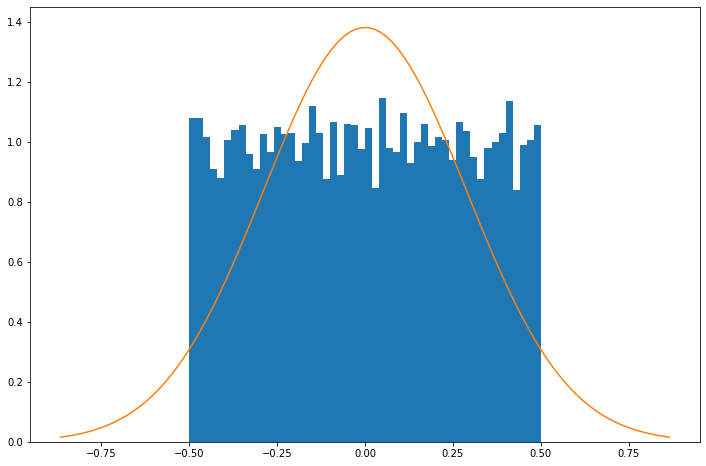

In [18]:
#Plot do histograma de 10.000 pontos finais de caminhadas aleatórias 1D de tamanho 1
histograma_pontos_finais(10000, 1, 50)

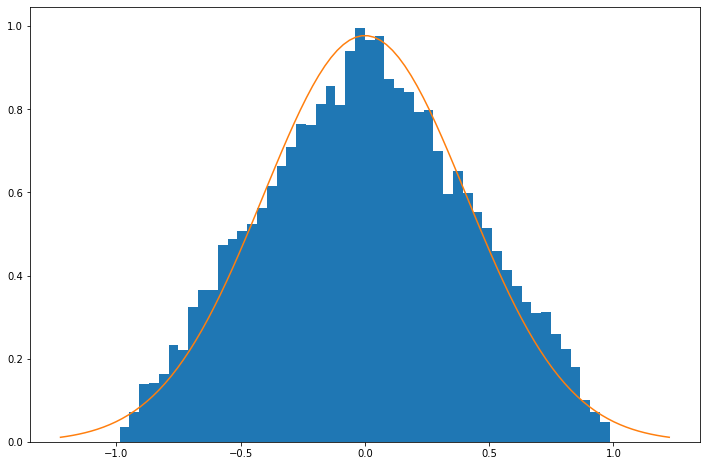

In [19]:
#Plot do histograma de 10.000 pontos finais de caminhadas aleatórias 1D de tamanho 2
histograma_pontos_finais(10000, 2, 50)

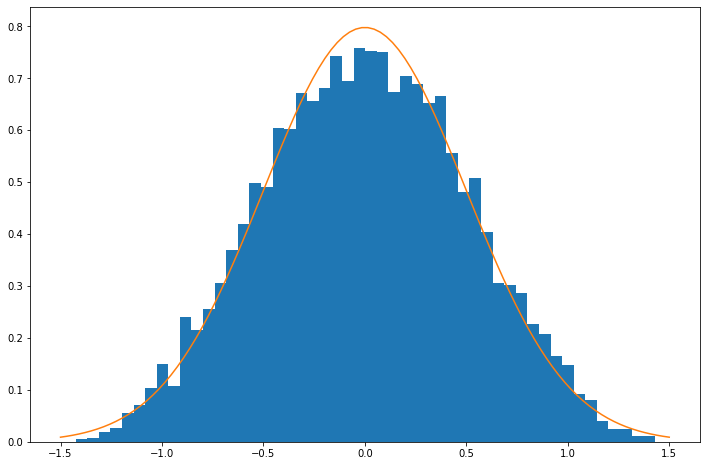

In [20]:
#Plot do histograma de 10.000 pontos finais de caminhadas aleatórias 1D de tamanho 3
histograma_pontos_finais(10000, 3, 50)

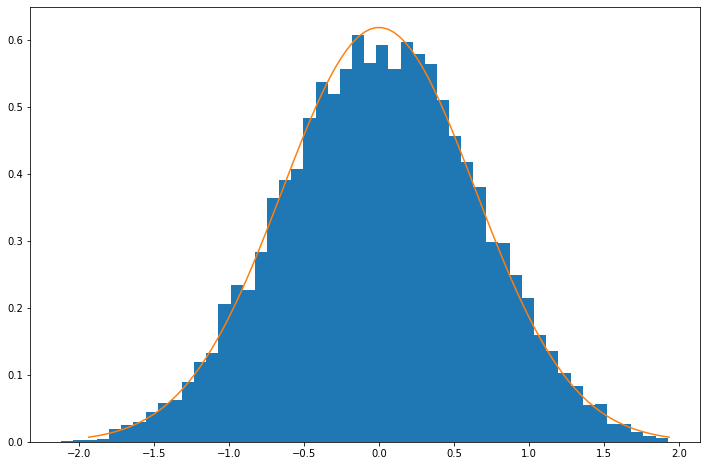

In [21]:
#Plot do histograma de 10.000 pontos finais de caminhadas aleatórias 1D de tamanho 5
histograma_pontos_finais(10000, 5, 50)

### Quão rápido a distribuição Gaussiana se torna uma boa aproximação para uma caminhada aleatória?
R: Quando $N$ = 2, temos uma forma "triangular", porém apartir de $N$ = 3 a distribuição dos pontos finais se torna mais parecida com uma distribuição Gaussiana, e a medida que $N$ aumenta, como $N$ = 5, a aproximação fica ainda melhor.